## See this notebook
on [Kaggle](https://www.kaggle.com/code/liaoguoying/eda-data-engineering-mlp-transformer-0-12)

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 设置显示所有列
pd.set_option('display.max_columns', None)

df = pd.read_csv("anxiety_attack_dataset.csv")

In [26]:
df

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,11998,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5


In [27]:
df.describe()

,ID,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.00000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,40.96675,6.482650,5.030892,246.696083,9.492833,5.462250,119.398500,25.462333,2.987417,4.518417,5.497333,5.507583
std,3464.24595,13.47328,2.014885,2.889000,144.487071,5.769364,2.897201,34.806711,8.090686,1.414482,2.866010,2.867579,2.858663
min,1.00000,18.00000,3.000000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,3000.75000,29.00000,4.800000,2.500000,122.000000,5.000000,3.000000,89.000000,18.000000,2.000000,2.000000,3.000000,3.000000
50%,6000.50000,41.00000,6.500000,5.000000,244.000000,9.000000,5.000000,119.000000,25.000000,3.000000,5.000000,5.000000,6.000000
75%,9000.25000,53.00000,8.200000,7.525000,371.000000,15.000000,8.000000,149.000000,32.000000,4.000000,7.000000,8.000000,8.000000
max,12000.00000,64.00000,10.000000,10.000000,499.000000,19.000000,10.000000,179.000000,39.000000,5.000000,9.000000,10.000000,10.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [29]:
df.drop('ID', axis=1, inplace=True)
df

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5


In [30]:
le = LabelEncoder()
columns = ['Gender', 'Occupation', 'Smoking', 
           'Family History of Anxiety', 'Dizziness', 
           'Medication', 'Recent Major Life Event']

mappings = {}

for column in columns:
    df[column] = le.fit_transform(df[column])
    mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# check mappings
for column, mapping in mappings.items():
    print(f"Mapping for {column}: {mapping}")

Mapping for Gender: {'Female': 0, 'Male': 1, 'Other': 2}
Mapping for Occupation: {'Doctor': 0, 'Engineer': 1, 'Other': 2, 'Student': 3, 'Teacher': 4, 'Unemployed': 5}
Mapping for Smoking: {'No': 0, 'Yes': 1}
Mapping for Family History of Anxiety: {'No': 0, 'Yes': 1}
Mapping for Dizziness: {'No': 0, 'Yes': 1}
Mapping for Medication: {'No': 0, 'Yes': 1}
Mapping for Recent Major Life Event: {'No': 0, 'Yes': 1}


In [31]:
df

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,56,0,2,9.6,8.3,175,6,0,0,4,145,33,3,0,0,4,1,9,10
1,46,1,4,6.4,7.3,97,6,0,0,3,143,18,5,1,0,0,0,9,8
2,32,0,0,6.9,1.0,467,14,0,0,2,60,34,1,0,0,7,1,10,5
3,60,1,0,9.2,3.7,471,16,0,1,6,94,19,1,0,1,4,1,5,8
4,25,1,3,9.2,2.5,364,2,0,1,7,152,15,4,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,28,1,1,4.4,4.1,360,1,1,1,1,139,20,2,1,0,7,0,9,6
11996,49,0,0,9.9,2.2,433,4,0,1,4,150,33,2,0,0,3,0,5,6
11997,23,0,3,9.8,8.1,140,19,1,0,2,81,33,2,0,0,8,0,1,10
11998,52,1,4,5.9,6.6,114,12,0,0,9,90,14,5,0,0,3,0,9,5


---

## visualization & data engineering

In [32]:
def visualize_column(df, column_name):
    unique_values = df[column_name].value_counts().sort_index()
    
    # Dynamically adjust the figure width based on the number of x-axis labels
    num_labels = len(unique_values)
    fig_width = max(6, num_labels * 0.5)  # Base width is 6, add 0.5 units for each additional label
    plt.figure(figsize=(fig_width, 6))  # Fixed height is 6
    
    unique_values.plot(kind='bar', edgecolor='black')
    plt.title(f'Count of Each Unique {column_name}')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.tight_layout()  # Automatically adjust layout to avoid label clipping


In [33]:
unique_ages = df['Age'].value_counts().sort_index()
unique_ages

Age
18    246
19    264
20    252
21    262
22    239
23    250
24    227
25    255
26    251
27    250
28    252
29    258
30    280
31    234
32    257
33    266
34    284
35    270
36    260
37    245
38    258
39    263
40    279
41    256
42    269
43    295
44    213
45    273
46    274
47    243
48    231
49    261
50    267
51    246
52    265
53    248
54    261
55    242
56    260
57    237
58    242
59    262
60    238
61    247
62    268
63    226
64    274
Name: count, dtype: int64

idk why these ages are this much 'discrete', cuz usually in large scale dataset we can see a 'pseudo-continuous' distribution.

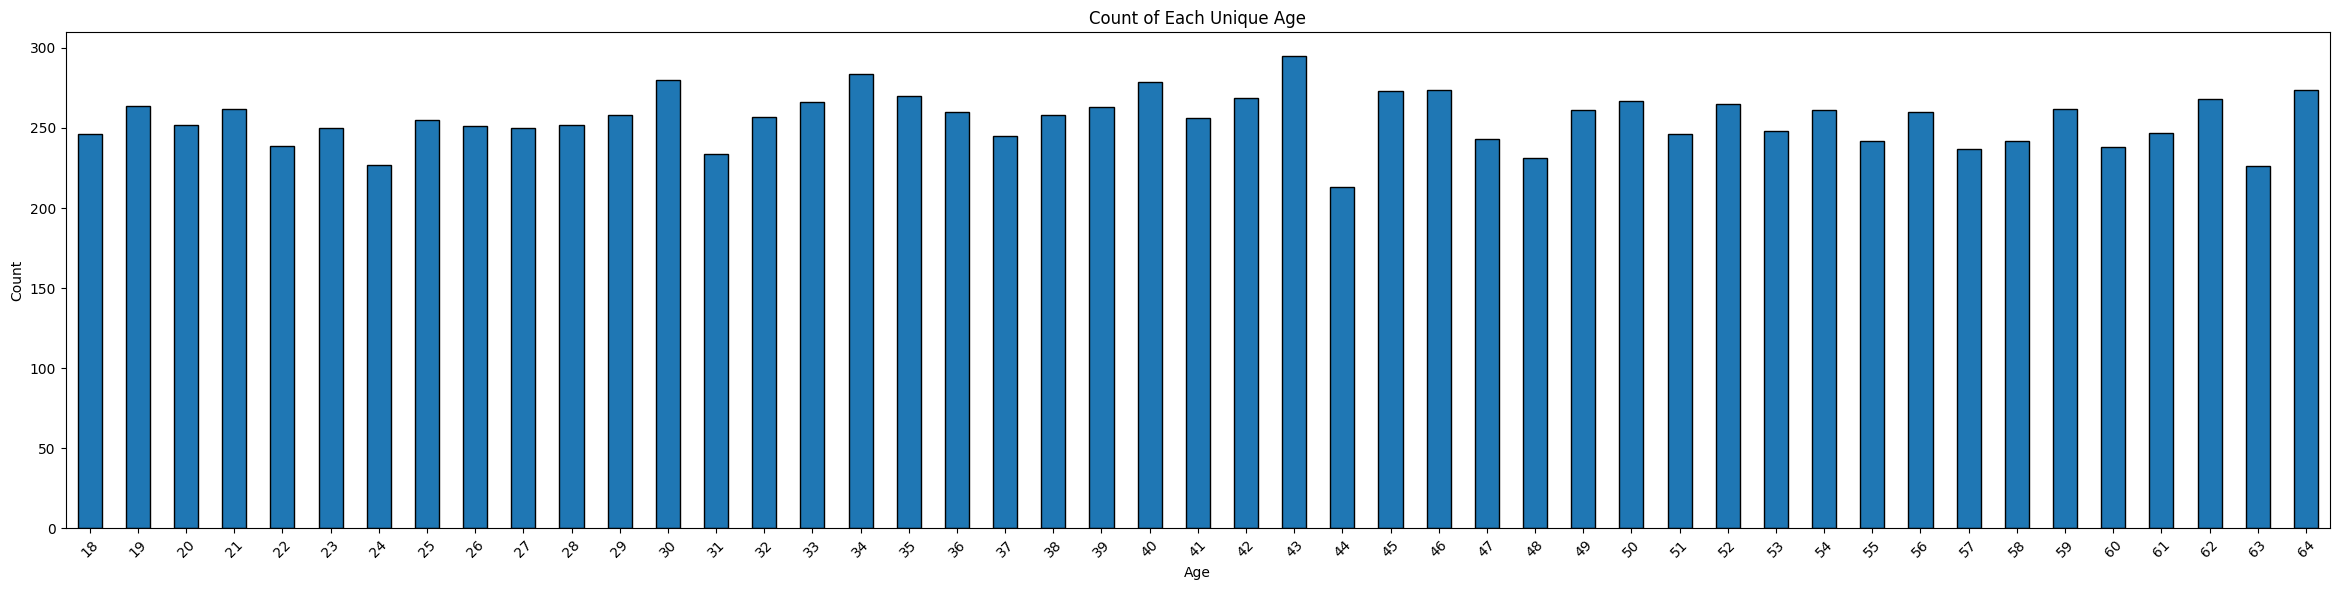

In [34]:
visualize_column(df, 'Age')

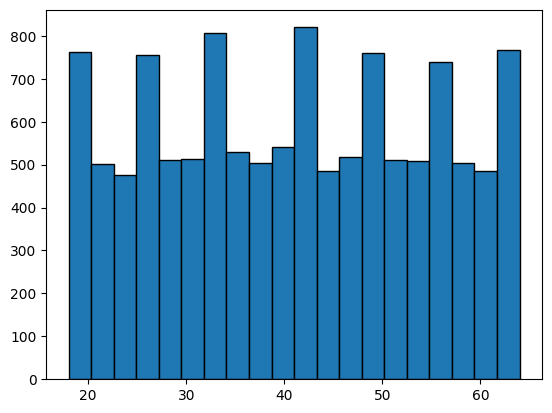

In [35]:
plt.hist(df["Age"], bins=20, edgecolor='black')
plt.show()

that is not what I call healthy data.

I want it better formed. To do so, I try to classify them using KMeans. For reusing this, I write it a func.

       Age  Class of Age
0       56             2
1       46             3
2       32             0
3       60             1
4       25             4
...    ...           ...
11995   28             0
11996   49             2
11997   23             4
11998   52             2
11999   50             2

[12000 rows x 2 columns]


               count       mean       std   min   25%   50%   75%   max
Class of Age                                                           
0             2606.0  32.511512  2.848925  28.0  30.0  33.0  35.0  37.0
1             1994.0  60.551655  2.294563  57.0  59.0  61.0  63.0  64.0
2             2281.0  52.021482  2.563915  48.0  50.0  52.0  54.0  56.0
3             2623.0  42.463591  2.854618  38.0  40.0  42.0  45.0  47.0
4             2496.0  22.473157  2.883315  18.0  20.0  22.0  25.0  27.0


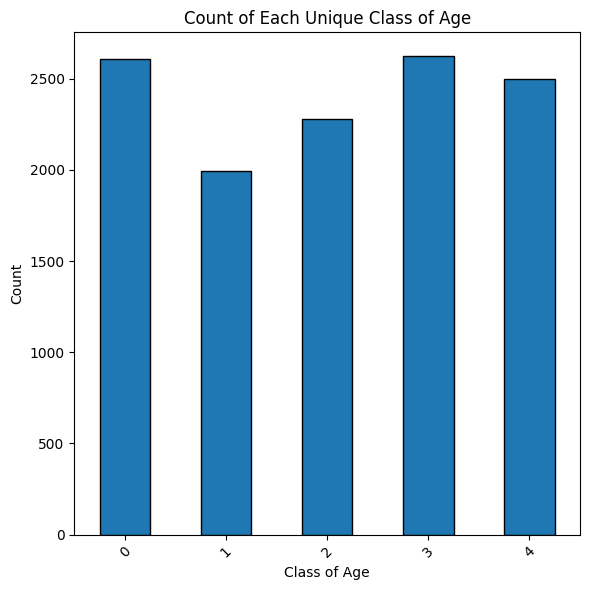

In [36]:
import numpy as np
from sklearn.cluster import KMeans

def auto_cluster(df, column_name, cluster_column_name, verbose=False):
    # Set the number of clusters
    k = 5

    # Use the best k value for clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[cluster_column_name] = kmeans.fit_predict(df[[column_name]])

    if verbose:
        # Print the original column and the cluster column
        print(df[[column_name, cluster_column_name]])
        print('\n')

        # Print the descriptive statistics for each cluster
        print(df.groupby(cluster_column_name)[column_name].describe())

        # Visualize the clusters
        visualize_column(df, cluster_column_name)

    return df

# Example usage
df = auto_cluster(df, 'Age', 'Class of Age', verbose=True)

---

lets go vis them all.

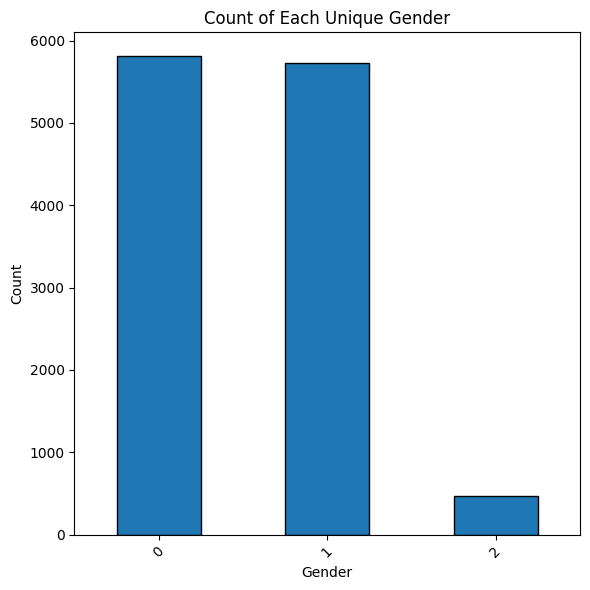

In [37]:
visualize_column(df, 'Gender')

oops, got some non-bisexual.

I want to check if non-bisexuals are more likely to have anxiety.

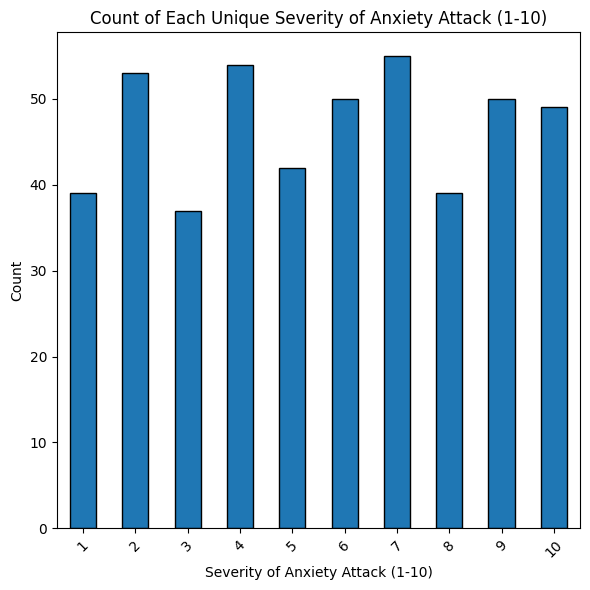

In [38]:
non_bisexuals = df[df['Gender'] == 2]

visualize_column(non_bisexuals, 'Severity of Anxiety Attack (1-10)')

In [39]:
print(non_bisexuals['Severity of Anxiety Attack (1-10)'].describe())
print('\n')
print(df[df['Gender']==0]['Severity of Anxiety Attack (1-10)'].describe())  # Male
print('\n')
print(df[df['Gender']==1]['Severity of Anxiety Attack (1-10)'].describe())  # Female

count    468.000000
mean       5.596154
std        2.846040
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Severity of Anxiety Attack (1-10), dtype: float64


count    5809.000000
mean        5.476158
std         2.861740
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Severity of Anxiety Attack (1-10), dtype: float64


count    5723.000000
mean        5.532238
std         2.856672
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Severity of Anxiety Attack (1-10), dtype: float64


Interestingly, non-bisexuals are more likely to have anxiety than bisexuals. Meanwhile, females are more likely to have anxiety than males. 

You can see it from the mean and std.

Men just don't give a f*ck to shit things right?

---

In [40]:
df

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10),Class of Age
0,56,0,2,9.6,8.3,175,6,0,0,4,145,33,3,0,0,4,1,9,10,2
1,46,1,4,6.4,7.3,97,6,0,0,3,143,18,5,1,0,0,0,9,8,3
2,32,0,0,6.9,1.0,467,14,0,0,2,60,34,1,0,0,7,1,10,5,0
3,60,1,0,9.2,3.7,471,16,0,1,6,94,19,1,0,1,4,1,5,8,1
4,25,1,3,9.2,2.5,364,2,0,1,7,152,15,4,0,1,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,28,1,1,4.4,4.1,360,1,1,1,1,139,20,2,1,0,7,0,9,6,0
11996,49,0,0,9.9,2.2,433,4,0,1,4,150,33,2,0,0,3,0,5,6,2
11997,23,0,3,9.8,8.1,140,19,1,0,2,81,33,2,0,0,8,0,1,10,4
11998,52,1,4,5.9,6.6,114,12,0,0,9,90,14,5,0,0,3,0,9,5,2


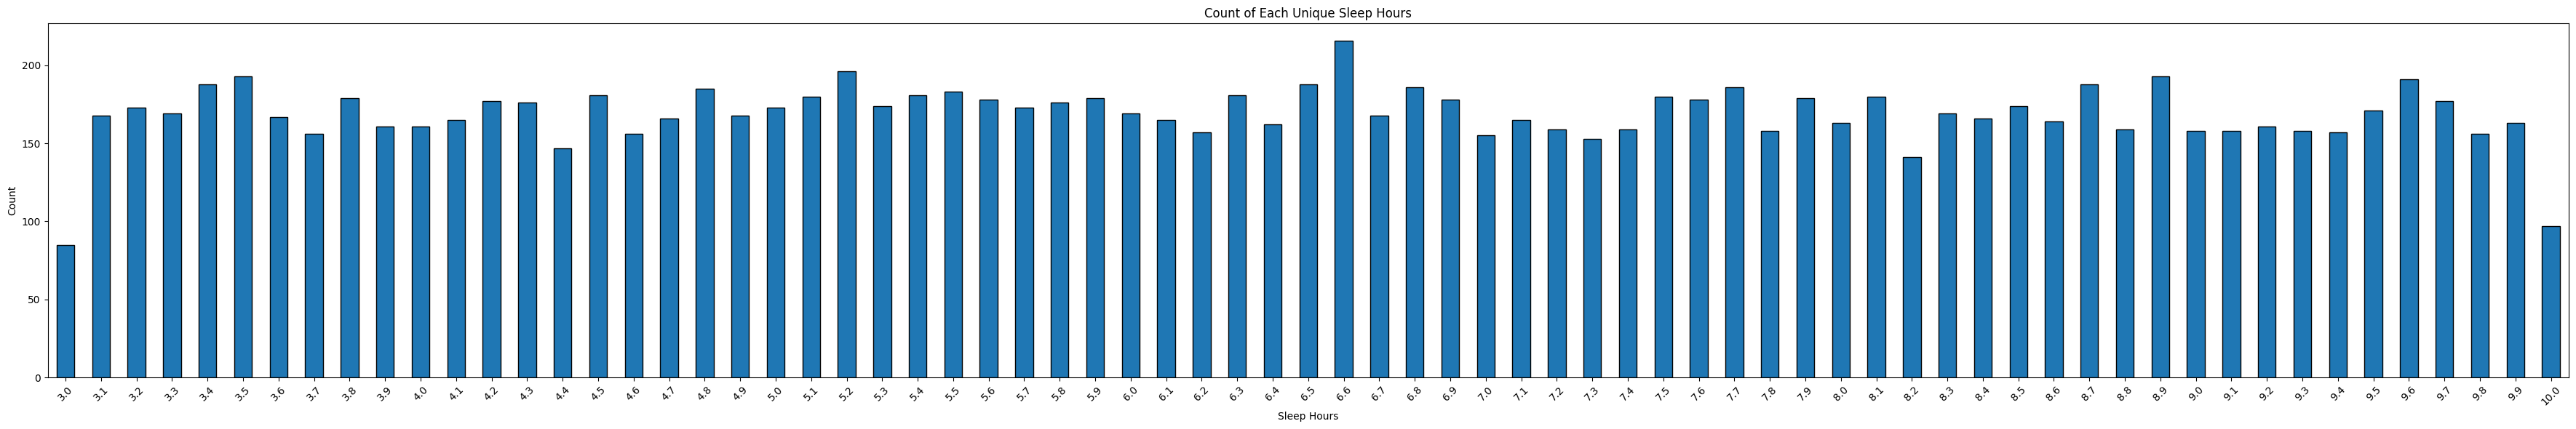

In [41]:
visualize_column(df, 'Sleep Hours')

Seems to much 'average'.

       Sleep Hours  Class of Sleep Hours
0              9.6                     2
1              6.4                     3
2              6.9                     3
3              9.2                     2
4              9.2                     2
...            ...                   ...
11995          4.4                     0
11996          9.9                     2
11997          9.8                     2
11998          5.9                     3
11999          6.6                     3

[12000 rows x 2 columns]


                       count      mean       std  min  25%  50%  75%   max
Class of Sleep Hours                                                      
0                     2465.0  3.714320  0.416280  3.0  3.4  3.7  4.1   4.4
1                     2336.0  7.751113  0.398314  7.1  7.4  7.7  8.1   8.4
2                     2625.0  9.224990  0.452188  8.5  8.8  9.2  9.6  10.0
3                     2280.0  6.403114  0.371050  5.8  6.1  6.4  6.7   7.0
4                     2294.0  

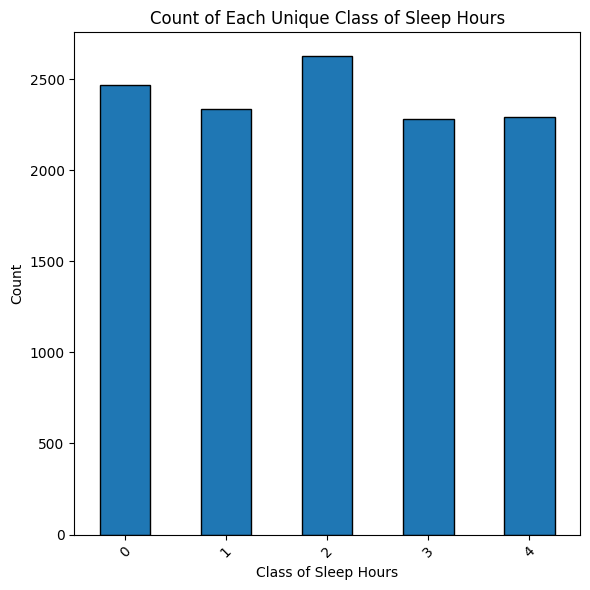

In [42]:
df = auto_cluster(df, 'Sleep Hours', 'Class of Sleep Hours', verbose=True)

here we may see, short duration sleep is class 0, followed by class 1 and 2 which are the medium and long.

---

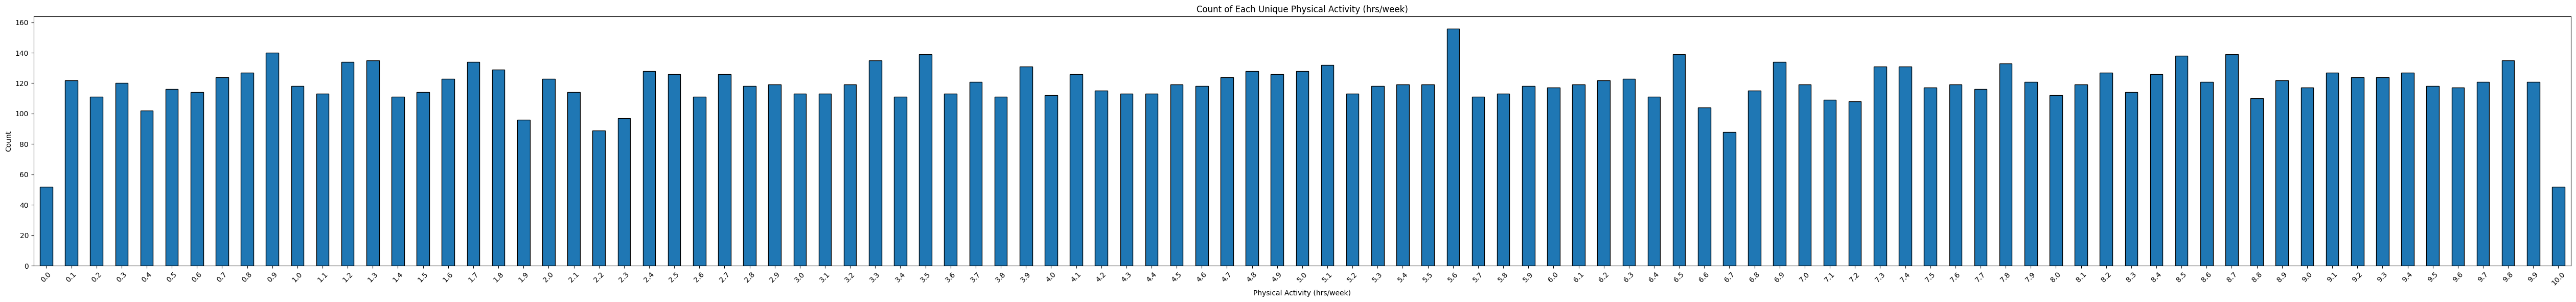

In [43]:
visualize_column(df, 'Physical Activity (hrs/week)')

we do the same trick on Physical Activity Duration.

       Physical Activity (hrs/week)  Class of Physical Activity
0                               8.3                           0
1                               7.3                           3
2                               1.0                           2
3                               3.7                           1
4                               2.5                           1
...                             ...                         ...
11995                           4.1                           1
11996                           2.2                           2
11997                           8.1                           3
11998                           6.6                           3
11999                           7.8                           3

[12000 rows x 2 columns]


                             count      mean       std  min  25%  50%  75%  \
Class of Physical Activity                                                   
0                           2280.0  9.069298  0.

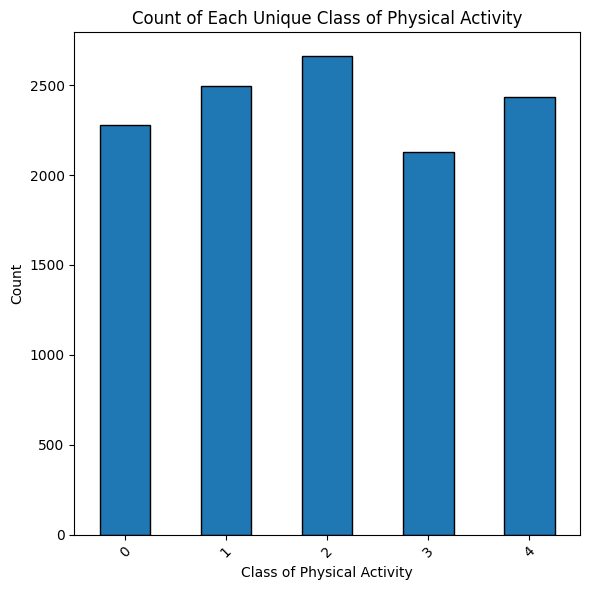

In [44]:
df = auto_cluster(df, 'Physical Activity (hrs/week)', 'Class of Physical Activity', verbose=True)

       Caffeine Intake (mg/day)  Class of Caffeine Intake
0                           175                         3
1                            97                         3
2                           467                         2
3                           471                         2
4                           364                         4
...                         ...                       ...
11995                       360                         4
11996                       433                         2
11997                       140                         3
11998                       114                         3
11999                       114                         3

[12000 rows x 2 columns]


                           count        mean        std    min    25%    50%  \
Class of Caffeine Intake                                                       
0                         2390.0  244.366527  28.671396  195.0  220.0  243.5   
1                         2366.0   4

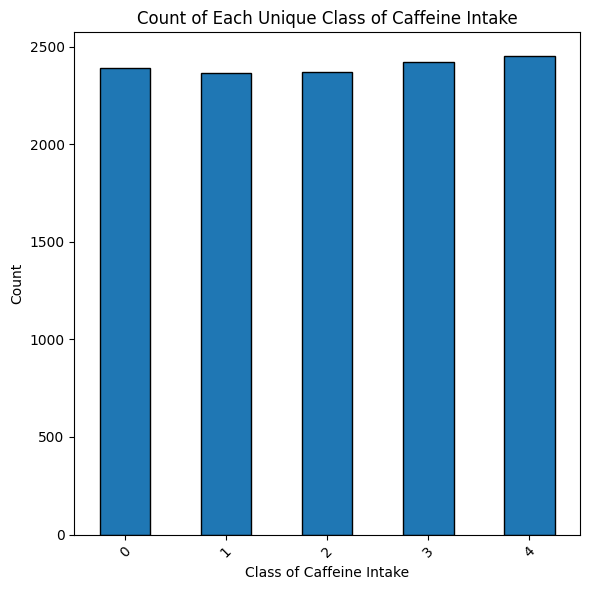

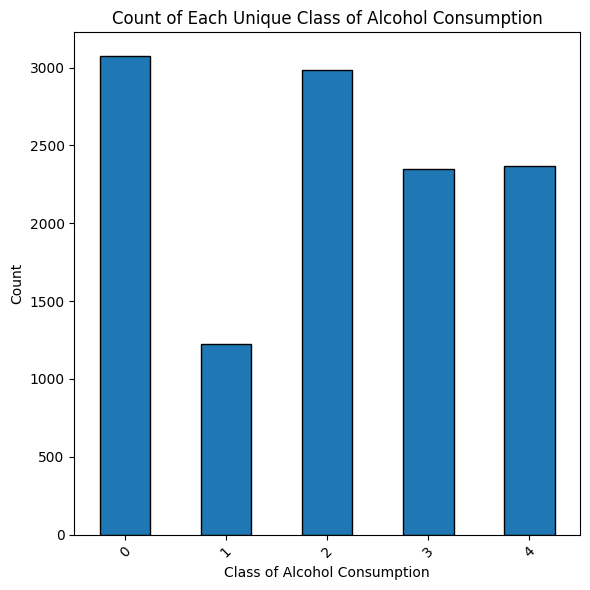

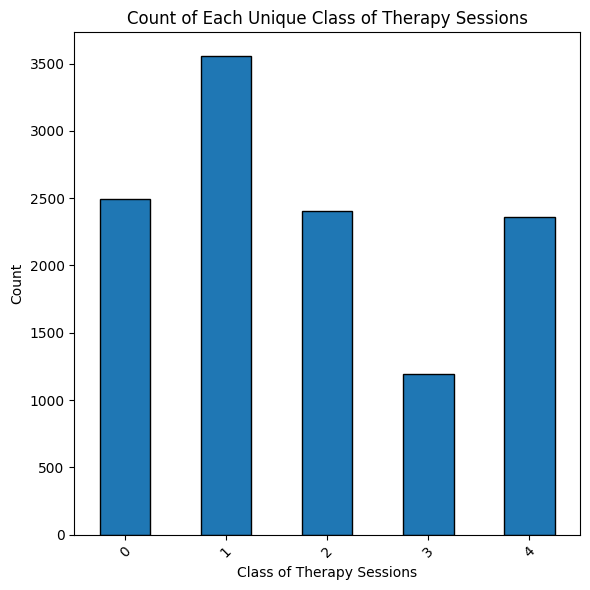

In [45]:
# Cluster Caffeine Intake (mg/day)
df = auto_cluster(df, 'Caffeine Intake (mg/day)', 'Class of Caffeine Intake', verbose=True)

# Cluster Alcohol Consumption (drinks/week)
df = auto_cluster(df, 'Alcohol Consumption (drinks/week)', 'Class of Alcohol Consumption', verbose=True)

# Cluster Therapy Sessions (per month)
df = auto_cluster(df, 'Therapy Sessions (per month)', 'Class of Therapy Sessions', verbose=True)

---

In [50]:
df.head(20)

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10),Class of Age,Class of Sleep Hours,Class of Physical Activity,Class of Caffeine Intake,Class of Alcohol Consumption,Class of Therapy Sessions,Sleep_Stress_Index,Activity_ Stimulant_Index,Diet_Alcohol_Index,Psychological_Pressure_Index,Physiological_Stress_Response,Symptom_Severity_Index
0,56,0,2,9.6,8.3,175,6,0,0,4,145,33,3,0,0,4,1,9,10,2,2,0,3,0,0,38.4,0.047159,3,NaN,181,NaN
1,46,1,4,6.4,7.3,97,6,0,0,3,143,18,5,1,0,0,0,9,8,3,3,3,3,0,1,19.2,0.074490,3,NaN,166,NaN
2,32,0,0,6.9,1.0,467,14,0,0,2,60,34,1,0,0,7,1,10,5,0,3,2,2,4,4,13.8,0.002137,-4,NaN,95,NaN
3,60,1,0,9.2,3.7,471,16,0,1,6,94,19,1,0,1,4,1,5,8,1,2,1,2,4,0,55.2,0.007839,-11,NaN,114,NaN
4,25,1,3,9.2,2.5,364,2,0,1,7,152,15,4,0,1,0,0,1,1,4,2,1,4,3,1,64.4,0.006849,-1,NaN,171,NaN
5,38,1,3,6.7,9.9,194,16,0,1,2,174,25,3,0,1,2,1,1,8,3,3,0,3,4,1,13.4,0.050769,-15,NaN,202,NaN
6,56,1,0,3.8,7.5,411,13,1,1,2,81,22,4,0,0,5,1,10,10,2,0,3,2,2,0,7.6,0.018204,-3,NaN,107,NaN
7,36,1,4,4.9,0.5,413,4,0,0,3,88,36,5,0,1,6,0,4,2,0,4,2,2,0,4,14.7,0.001208,0,NaN,129,NaN
8,40,1,0,6.2,9.0,284,6,0,0,4,121,28,2,0,0,0,0,5,4,3,3,0,0,0,1,24.8,0.031579,-1,NaN,151,NaN
9,28,0,0,8.3,9.3,148,18,0,1,5,145,12,4,0,0,3,0,10,4,0,1,0,3,1,3,41.5,0.062416,-8,NaN,161,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                12000 non-null  int64  
 1   Gender                             12000 non-null  int32  
 2   Occupation                         12000 non-null  int32  
 3   Sleep Hours                        12000 non-null  float64
 4   Physical Activity (hrs/week)       12000 non-null  float64
 5   Caffeine Intake (mg/day)           12000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 7   Smoking                            12000 non-null  int32  
 8   Family History of Anxiety          12000 non-null  int32  
 9   Stress Level (1-10)                12000 non-null  int64  
 10  Heart Rate (bpm during attack)     12000 non-null  int64  
 11  Breathing Rate (breaths/min)       12000 non-null  int

In [52]:
df['Sleep_Stress_Index'] = df['Sleep Hours'] * df['Stress Level (1-10)']
df['Activity_ Stimulant_Index'] = df['Physical Activity (hrs/week)'] / (df['Caffeine Intake (mg/day)'] + 1)
df['Diet_Alcohol_Index'] = df['Diet Quality (1-10)'] - df['Alcohol Consumption (drinks/week)']
df['Psychological_Pressure_Index'] = df['Stress Level (1-10)'] + df['Family History of Anxiety'] + df['Recent Major Life Event']
df['Physiological_Stress_Response'] = df['Heart Rate (bpm during attack)'] + df['Breathing Rate (breaths/min)'] + df['Sweating Level (1-5)']
df['Symptom_Severity_Index'] = df['Dizziness'] + df['Sweating Level (1-5)']

In [53]:
df.head(20)

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10),Class of Age,Class of Sleep Hours,Class of Physical Activity,Class of Caffeine Intake,Class of Alcohol Consumption,Class of Therapy Sessions,Sleep_Stress_Index,Activity_ Stimulant_Index,Diet_Alcohol_Index,Psychological_Pressure_Index,Physiological_Stress_Response,Symptom_Severity_Index
0,56,0,2,9.6,8.3,175,6,0,0,4,145,33,3,0,0,4,1,9,10,2,2,0,3,0,0,38.4,0.047159,3,5,181,3
1,46,1,4,6.4,7.3,97,6,0,0,3,143,18,5,1,0,0,0,9,8,3,3,3,3,0,1,19.2,0.074490,3,3,166,6
2,32,0,0,6.9,1.0,467,14,0,0,2,60,34,1,0,0,7,1,10,5,0,3,2,2,4,4,13.8,0.002137,-4,3,95,1
3,60,1,0,9.2,3.7,471,16,0,1,6,94,19,1,0,1,4,1,5,8,1,2,1,2,4,0,55.2,0.007839,-11,8,114,1
4,25,1,3,9.2,2.5,364,2,0,1,7,152,15,4,0,1,0,0,1,1,4,2,1,4,3,1,64.4,0.006849,-1,8,171,4
5,38,1,3,6.7,9.9,194,16,0,1,2,174,25,3,0,1,2,1,1,8,3,3,0,3,4,1,13.4,0.050769,-15,4,202,3
6,56,1,0,3.8,7.5,411,13,1,1,2,81,22,4,0,0,5,1,10,10,2,0,3,2,2,0,7.6,0.018204,-3,4,107,4
7,36,1,4,4.9,0.5,413,4,0,0,3,88,36,5,0,1,6,0,4,2,0,4,2,2,0,4,14.7,0.001208,0,3,129,5
8,40,1,0,6.2,9.0,284,6,0,0,4,121,28,2,0,0,0,0,5,4,3,3,0,0,0,1,24.8,0.031579,-1,4,151,2
9,28,0,0,8.3,9.3,148,18,0,1,5,145,12,4,0,0,3,0,10,4,0,1,0,3,1,3,41.5,0.062416,-8,6,161,4


---

## Train

In [63]:
from sklearn.model_selection import train_test_split

# columns to drop:
# you can select the columns whatever you like or dislike
columns_to_drop = [
    'Severity of Anxiety Attack (1-10)',
    'Age',
    'Sleep Hours',
    'Physical Activity (hrs/week)',
    'Caffeine Intake (mg/day)',
    'Alcohol Consumption (drinks/week)',
    'Therapy Sessions (per month)'
]

X = df.drop(columns=columns_to_drop, axis=1)
y = df['Severity of Anxiety Attack (1-10)'] - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 初始化 XGBoost 分类器
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', learning_rate=0.1)

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 打印分类报告
print('Classification Report:')
print(classification_report(y_test, y_pred))

# 打印混淆矩阵
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

c:\Users\29724\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [23:20:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.10
Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.11      0.10       236
           1       0.14      0.13      0.13       247
           2       0.05      0.05      0.05       212
           3       0.12      0.09      0.10       261
           4       0.10      0.13      0.11       233
           5       0.11      0.10      0.10       256
           6       0.12      0.13      0.13       249
           7       0.08      0.08      0.08       226
           8       0.09      0.08      0.09       255
           9       0.09      0.08      0.08       225

    accuracy                           0.10      2400
   macro avg       0.10      0.10      0.10      2400
weighted avg       0.10      0.10      0.10      2400

Confusion Matrix:
[[27 13 20 16 37 26 30 22 24 21]
 [38 31 28 19 31 26 22 12 24 16]
 [31 17 11 19 24 29 20 20 18 23]
 [37 27 18 24 33 20 22 30 29 21]
 [22 17 21 26 31 24 29 22 19 22]
 [39 22 28 21 36 25 